In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
# Now load data and train
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255


def create_model():
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model()  # Now this function is defined
model.fit(x_train, y_train, epochs=5, batch_size=32)
model.save_weights('mnist.weights.h5')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9135 - loss: 0.2884
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9915 - loss: 0.0277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9944 - loss: 0.0184
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0126


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


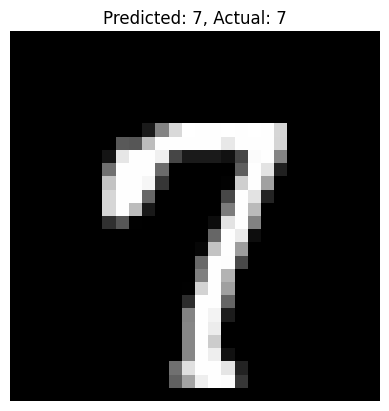

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
sample_image = x_test[5657]
sample_label = y_test[5657]

# Preprocess
image = sample_image.reshape(1, 28, 28, 1).astype('float32') / 255

# Predict
prediction = model.predict(image)
predicted_digit = np.argmax(prediction)

# Show result
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {sample_label}")
plt.axis('off')
plt.show()

In [ ]:
################ EXPERIMENT##################

# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# from PIL import Image
# import tensorflow as tf
# from tensorflow import keras

# def preprocess_image(image_path):
#     # Read the image
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Resize to 28x28 (MNIST format)
#     img = cv2.resize(img, (28, 28))

#     # Invert if needed (MNIST has white digits on black background)
#     if np.mean(img) > 127:
#         img = 255 - img

#     # Normalize to [0,1]
#     img = img.astype('float32') / 255.0

#     # Add dimensions to match model input shape (batch_size, height, width, channels)
#     img = np.expand_dims(img, axis=-1)  # Add channel dimension
#     img = np.expand_dims(img, axis=0)   # Add batch dimension

#     return img

# # Load the saved model
# model = create_model()
# model.load_weights('mnist.weights.h5')

# # Path to your image
# image_path = '6.png'  # Replace with actual path to your digit 5 image

# # Preprocess the image
# processed_image = preprocess_image(image_path)

# # Make prediction
# predictions = model.predict(processed_image)
# predicted_digit = np.argmax(predictions[0])
# confidence = predictions[0][predicted_digit] * 100

# # Display results
# plt.figure(figsize=(12, 4))

# # Original image
# plt.subplot(1, 3, 1)
# orig_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# plt.imshow(orig_img, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# # Processed image
# plt.subplot(1, 3, 2)
# plt.imshow(processed_image[0, :, :, 0], cmap='gray')
# plt.title('Processed Image (28x28)')
# plt.axis('off')

# # Prediction probabilities
# plt.subplot(1, 3, 3)
# plt.bar(range(10), predictions[0])
# plt.xticks(range(10))
# plt.title('Prediction Probabilities')

# plt.tight_layout()
# plt.show()

# # Print results
# print(f"Predicted digit: {predicted_digit}")
# print(f"Confidence: {confidence:.2f}%")

# # Evaluate model on test set to get overall accuracy
# (_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f'Overall model accuracy on MNIST test set: {test_acc:.4f}')

In [ ]:
'''import cv2
import numpy as np

# Preprocess the image to enhance the Sudoku grid and remove noise
def preprocess(img):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blur = cv2.GaussianBlur(img_gray, (9, 9), 0)

    # Apply adaptive thresholding to highlight edges
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2)

    # Invert the image: grid lines and digits become white
    inverted = cv2.bitwise_not(thresh)

    # Create a small rectangular kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    # Use morphological opening to remove noise (like stray dots)
    morph = cv2.morphologyEx(inverted, cv2.MORPH_OPEN, kernel)

    # Dilate to thicken white regions (like grid lines)
    result = cv2.dilate(morph, kernel, iterations=1)

    return result
sudoku_a = cv2.imread("/content/WhatsApp Image 2025-04-18 at 16.13.15_c5bc24d9.jpg")
if sudoku_a is None:
    raise ValueError("Image file '2.png' not found.")

threshold = preprocess(sudoku_a)

# Find and draw contours
contour_1 = sudoku_a.copy()
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1,contours, -1, (0, 255, 0), 3)

# Order the four corner points of a quadrilateral: TL, TR, BR, BL
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    # Sum of coordinates: smallest = top-left, largest = bottom-right
    s = pts.sum(axis=1)

    # Difference of coordinates: smallest = top-right, largest = bottom-left
    diff = np.diff(pts, axis=1)

    rect[0] = pts[np.argmin(s)]      # top-left
    rect[2] = pts[np.argmax(s)]      # bottom-right
    rect[1] = pts[np.argmin(diff)]   # top-right
    rect[3] = pts[np.argmax(diff)]   # bottom-left

    return rect

# Find the largest white square (i.e., Sudoku grid), and flatten it
def find_largest_square_and_warp(image):
    processed = preprocess(image)

    # Find all external contours in the image
    contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    biggest = None
    max_area = 0

    # Loop through all contours and find the largest 4-sided polygon
    for c in contours:
        approx = cv2.approxPolyDP(c, 0.02 * cv2.arcLength(c, True), True)
        if len(approx) == 4 and cv2.isContourConvex(approx):
            area = cv2.contourArea(approx)
            if area > max_area:
                biggest = approx
                max_area = area

    if biggest is None:
        raise ValueError("No grid found!")

    # Order and reshape corner points
    pts = order_points(biggest.reshape(4, 2))

    # Determine the size of the square to warp to
    side = max(
        np.linalg.norm(pts[0] - pts[1]),
        np.linalg.norm(pts[1] - pts[2]),
        np.linalg.norm(pts[2] - pts[3]),
        np.linalg.norm(pts[3] - pts[0])
    )
    side = int(side)

    # Destination square (warped image)
    dst = np.array([
        [0, 0],
        [side - 1, 0],
        [side - 1, side - 1],
        [0, side - 1]
    ], dtype="float32")

    # Perform perspective transformation
    M = cv2.getPerspectiveTransform(pts, dst)
    warped = cv2.warpPerspective(image, M, (side, side))

    return warped

# Split the warped Sudoku square into 81 equal 9x9 cells
def split_into_cells(warped_img):
    # Convert to grayscale
    gray = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)

    side = gray.shape[0]
    cell_size = side // 9

    cells = []

    # Loop over 9 rows and 9 columns to extract each cell
    for row in range(9):
        for col in range(9):
            x = col * cell_size
            y = row * cell_size
            cell = gray[y:y+cell_size, x:x+cell_size]
            cells.append(cell)

    return cells

# Predict the digit in each cell using a trained model
def predict_digits(cells, model):
    predictions = []

    for cell in cells:
        # Resize each cell to the model's input shape (e.g. 28x28)
        roi = cv2.resize(cell, (28, 28))

        # Normalize the image to 0–1
        roi = roi / 255.0

        # Reshape for model input: (batch, height, width, channels)
        roi = roi.reshape(1, 28, 28, 1)

        # Predict the digit
        pred = model.predict(roi)

        # Get the index of the highest probability
        digit = np.argmax(pred)
        predictions.append(digit)

    return predictions
'''

'import cv2\nimport numpy as np\n\n# Preprocess the image to enhance the Sudoku grid and remove noise\ndef preprocess(img):\n    # Convert image to grayscale\n    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\n    # Apply Gaussian blur to reduce noise\n    blur = cv2.GaussianBlur(img_gray, (9, 9), 0)\n\n    # Apply adaptive thresholding to highlight edges\n    thresh = cv2.adaptiveThreshold(\n        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\n        cv2.THRESH_BINARY, 11, 2)\n\n    # Invert the image: grid lines and digits become white\n    inverted = cv2.bitwise_not(thresh)\n\n    # Create a small rectangular kernel\n    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))\n\n    # Use morphological opening to remove noise (like stray dots)\n    morph = cv2.morphologyEx(inverted, cv2.MORPH_OPEN, kernel)\n\n    # Dilate to thicken white regions (like grid lines)\n    result = cv2.dilate(morph, kernel, iterations=1)\n    \n    return result\nsudoku_a = cv2.imread("/content/

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

model = create_model()            # Recreate the architecture
model.load_weights('mnist.weights.h5')

def preprocess(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # blur it
    blur = cv2.GaussianBlur(img_gray, (9, 9), 0)

    # threshold it
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # invert it so the grid lines and text are white
    inverted = cv2.bitwise_not(thresh, 0)

    # get a rectangle kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    # morph it to remove some noise like random dots
    morph = cv2.morphologyEx(inverted, cv2.MORPH_OPEN, kernel)

    # dilate to increase border size
    result = cv2.dilate(morph, kernel, iterations=1)
    return result

# Load and preprocess the Sudoku image
sudoku_a = cv2.imread("/content/Screenshot 2025-04-18 164629.png")
if sudoku_a is None:
    raise ValueError("Image file '2.png' not found.")

threshold = preprocess(sudoku_a)

# Find and draw contours
contour_1 = sudoku_a.copy()
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1,contours, -1, (0, 255, 0), 3)

# Find the largest Sudoku grid contour
def main_outline(contours):
    biggest = np.array([])
    max_area = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest, max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4, 1, 2), dtype=np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis=1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

# Warp perspective to get top-down view of Sudoku
biggest, maxArea = main_outline(contours)
if biggest.size == 0:
    raise ValueError("No Sudoku grid found.")
biggest = reframe(biggest)
pts1 = np.float32(biggest)
pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imagewrap = cv2.warpPerspective(sudoku_a, matrix, (450, 450))
imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

# Split into cells and crop
def splitcells(img):
    rows = np.vsplit(img, 9)
    boxes = []
    for row in rows:
        cols = np.hsplit(row, 9)
        for box in cols:
            boxes.append(box)
    return boxes

sudoku_cell = splitcells(imagewrap)

def CropCell(cells):
    cropped = []
    for cell in cells:
        h, w = cell.shape
        cell = cell[5:h-5, 5:w-5]  # Crop 5 pixels from each side
        cropped.append(cell)
    return cropped

sudoku_cell_cropped = CropCell(sudoku_cell)

# Preprocess individual cells for prediction
def preprocess_image(img):
    img = cv2.resize(img, (28, 28))
    if np.mean(img) > 127:
        img = 255 - img
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

# Predict digits in cells
def read_cells(cells, model):
    result = []
    for cell in cells:
        processed = preprocess_image(cell)
        predictions = model.predict(processed)
        classIndex = np.argmax(predictions, axis=1)
        probabilityValue = np.amax(predictions)
        result.append(classIndex[0] if probabilityValue > 0.5 else 0)
    return result

grid = read_cells(sudoku_cell_cropped, model)
grid = np.array(grid).reshape(9, 9)
print("Predicted Sudoku grid:")
print(grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

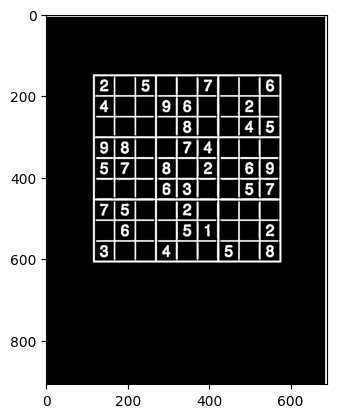

In [ ]:
plt.imshow(threshold, cmap='gray')


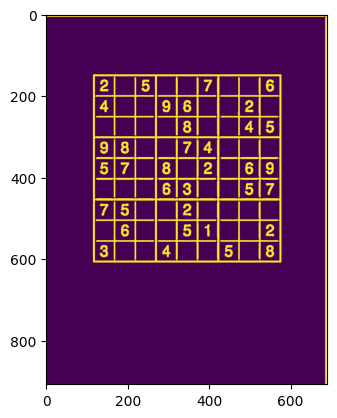

In [ ]:
def find_largest_white_square(image):
    # The image is already preprocessed, so don't call preprocess again
    # preprocessed = preprocess(image)
    preprocessed = image  # Use the image directly

    # Find contours
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0
    biggest_square = None

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4 and cv2.isContourConvex(approx):
            area = cv2.contourArea(approx)
            if area > max_area:
                max_area = area
                biggest_square = approx

    # Draw the biggest square (optional visualization)
    result = image.copy()
    if biggest_square is not None:
        cv2.drawContours(result, [biggest_square], -1, (0, 255, 0), 3)

    return result, biggest_square
ans = find_largest_white_square(threshold)
plt.imshow(threshold)

In [ ]:
cv2.imshow(imagewrap)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
print(maxArea)

615167.5
